In [4]:
import keras
keras.__version__
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
import numpy as np
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 117us/step - loss: 2.7274 - accuracy: 0.4985 - val_loss: 1.8478 - val_accuracy: 0.6370
Epoch 2/20
7982/7982 [==============================] - 1s 91us/step - loss: 1.4904 - accuracy: 0.6916 - val_loss: 1.3091 - val_accuracy: 0.7140
Epoch 3/20
7982/7982 [==============================] - ETA: 0s - loss: 1.0664 - accuracy: 0.77 - 1s 90us/step - loss: 1.0643 - accuracy: 0.7707 - val_loss: 1.1204 - val_accuracy: 0.7550
Epoch 4/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.8291 - accuracy: 0.8285 - val_loss: 1.0220 - val_accuracy: 0.7950
Epoch 5/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.6622 - accuracy: 0.8653 - val_loss: 0.9531 - val_accuracy: 0.8060
Epoch 6/20
7982/7982 [==============================] - 1s 91us/step - loss: 0.5280 - accuracy: 0.8911 - val_loss: 0.9321 - val_accuracy: 0.8080
Epoch 7/20
7982/7982 [=================

In [38]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 101us/step - loss: 3.6236 - accuracy: 0.1882 - val_loss: 3.3215 - val_accuracy: 0.3910
Epoch 2/20
7982/7982 [==============================] - 1s 80us/step - loss: 3.0452 - accuracy: 0.5192 - val_loss: 2.7597 - val_accuracy: 0.5750
Epoch 3/20
7982/7982 [==============================] - 1s 79us/step - loss: 2.4487 - accuracy: 0.6079 - val_loss: 2.2023 - val_accuracy: 0.6160
Epoch 4/20
7982/7982 [==============================] - 1s 80us/step - loss: 1.9179 - accuracy: 0.6508 - val_loss: 1.7862 - val_accuracy: 0.6390
Epoch 5/20
7982/7982 [==============================] - 1s 80us/step - loss: 1.5580 - accuracy: 0.6972 - val_loss: 1.5391 - val_accuracy: 0.6640
Epoch 6/20
7982/7982 [==============================] - 1s 79us/step - loss: 1.3333 - accuracy: 0.7192 - val_loss: 1.3890 - val_accuracy: 0.6850
Epoch 7/20
7982/7982 [==============================] - 1s 79us/step - loss: 1.18

In [40]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=7,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 1s 113us/step - loss: 2.2292 - accuracy: 0.5405 - val_loss: 1.3858 - val_accuracy: 0.6890
Epoch 2/7
7982/7982 [==============================] - 1s 104us/step - loss: 1.1207 - accuracy: 0.7613 - val_loss: 1.0958 - val_accuracy: 0.7690
Epoch 3/7
7982/7982 [==============================] - 1s 103us/step - loss: 0.7887 - accuracy: 0.8340 - val_loss: 1.0368 - val_accuracy: 0.7680
Epoch 4/7
7982/7982 [==============================] - 1s 102us/step - loss: 0.5772 - accuracy: 0.8810 - val_loss: 0.9882 - val_accuracy: 0.7750
Epoch 5/7
7982/7982 [==============================] - 1s 103us/step - loss: 0.4137 - accuracy: 0.9122 - val_loss: 0.8675 - val_accuracy: 0.8170
Epoch 6/7
7982/7982 [==============================] - 1s 102us/step - loss: 0.3165 - accuracy: 0.9297 - val_loss: 0.9022 - val_accuracy: 0.8070
Epoch 7/7
2246/2246 [==============================] - 0s 108us/step


In [50]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=22,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/22
7982/7982 [==============================] - 1s 89us/step - loss: 3.2455 - accuracy: 0.3887 - val_loss: 2.8046 - val_accuracy: 0.4690
Epoch 2/22
7982/7982 [==============================] - 1s 80us/step - loss: 2.4743 - accuracy: 0.5378 - val_loss: 2.2500 - val_accuracy: 0.5890
Epoch 3/22
7982/7982 [==============================] - 1s 78us/step - loss: 1.9795 - accuracy: 0.6543 - val_loss: 1.8712 - val_accuracy: 0.6560
Epoch 4/22
7982/7982 [==============================] - 1s 78us/step - loss: 1.6421 - accuracy: 0.7066 - val_loss: 1.6207 - val_accuracy: 0.6820
Epoch 5/22
7982/7982 [==============================] - 1s 79us/step - loss: 1.4080 - accuracy: 0.7340 - val_loss: 1.4484 - val_accuracy: 0.7140
Epoch 6/22
7982/7982 [==============================] - 1s 80us/step - loss: 1.2352 - accuracy: 0.7551 - val_loss: 1.3273 - val_accuracy: 0.7230
Epoch 7/22
7982/7982 [==============================] - 1s 79us/step - loss: 1.102

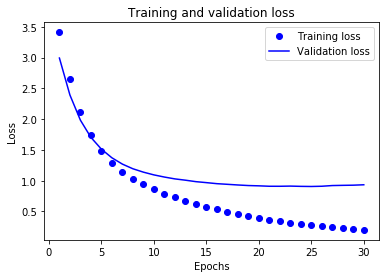

In [47]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

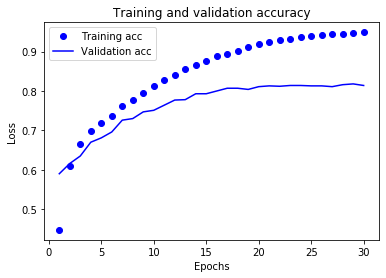

In [48]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [51]:
results

[0.9711126423476534, 0.7813891172409058]